In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import os
import math
import networkx as nx
import matplotlib as mlt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.patches as patches
import shapefile
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from cmcrameri import cm
import calendar

In [2]:
#read connectivity degree file
df=pd.read_csv(f'Connectivity_degree.csv', index_col=0)
ids_connec=pd.read_csv(f'Connectivity_ids.csv', index_col=0)

#read file with lat and long info
col_list=['id','latitude', 'longitude']
Cabra_info= pd.read_csv('All_attributes_drought.csv',engine='python', index_col=None, sep=',', usecols=col_list)

In [3]:
#Merge the files, because we need information of latitude and longitude
df_connec= pd.merge(df, Cabra_info, on='id', how='inner')

In [4]:
#compute the n connected events per year
ids_connec["Average N of connected events"]=ids_connec["N of connected events"]/39

In [5]:
# renanme to match
df_connec=df_connec.rename({'id':'id1'}, axis='columns')

In [6]:
high_connec=ids_connec.loc[(ids_connec["N of connected events"]>=8)]

In [7]:
# Create graph
graph = nx.from_pandas_edgelist(high_connec, source = 'id1', target = 'id2', 
                        edge_attr = 'N of connected events',
                        create_using = nx.DiGraph())

In [8]:
#Reorder df to assign the good to each node
node_degree=df.set_index('id')

In [9]:
node_degree=node_degree.reindex(graph.nodes())

In [10]:
m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7, 
            llcrnrlon=-77, urcrnrlon=-32, lat_ts= 0, resolution='l', suppress_ticks=True)

In [11]:
# import long lat as m attribute
mx, my = m(df_connec['longitude'].values, df_connec['latitude'].values)
pos = {}
for count, elem in enumerate (df_connec['id1']):
    pos[elem] = (mx[count], my[count])

C:\Users\gqg5266\AppData\Local\Temp\ipykernel_6532\24953115.py:33: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches.append( Polygon(np.array(shape), True))
C:\Users\gqg5266\AppData\Local\Temp\ipykernel_6532\24953115.py:35: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches2.append( Polygon(np.array(shape), True))
C:\Users\gqg5266\AppData\Local\Temp\ipykernel_6532\24953115.py:37: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches3.append( Polygon(np.array(shape), True))
C:\Users\gqg5266\AppData\Local\Temp\ipykernel_6532\24953115.py:39: MatplotlibDeprecati

<function matplotlib.pyplot.show(close=None, block=None)>

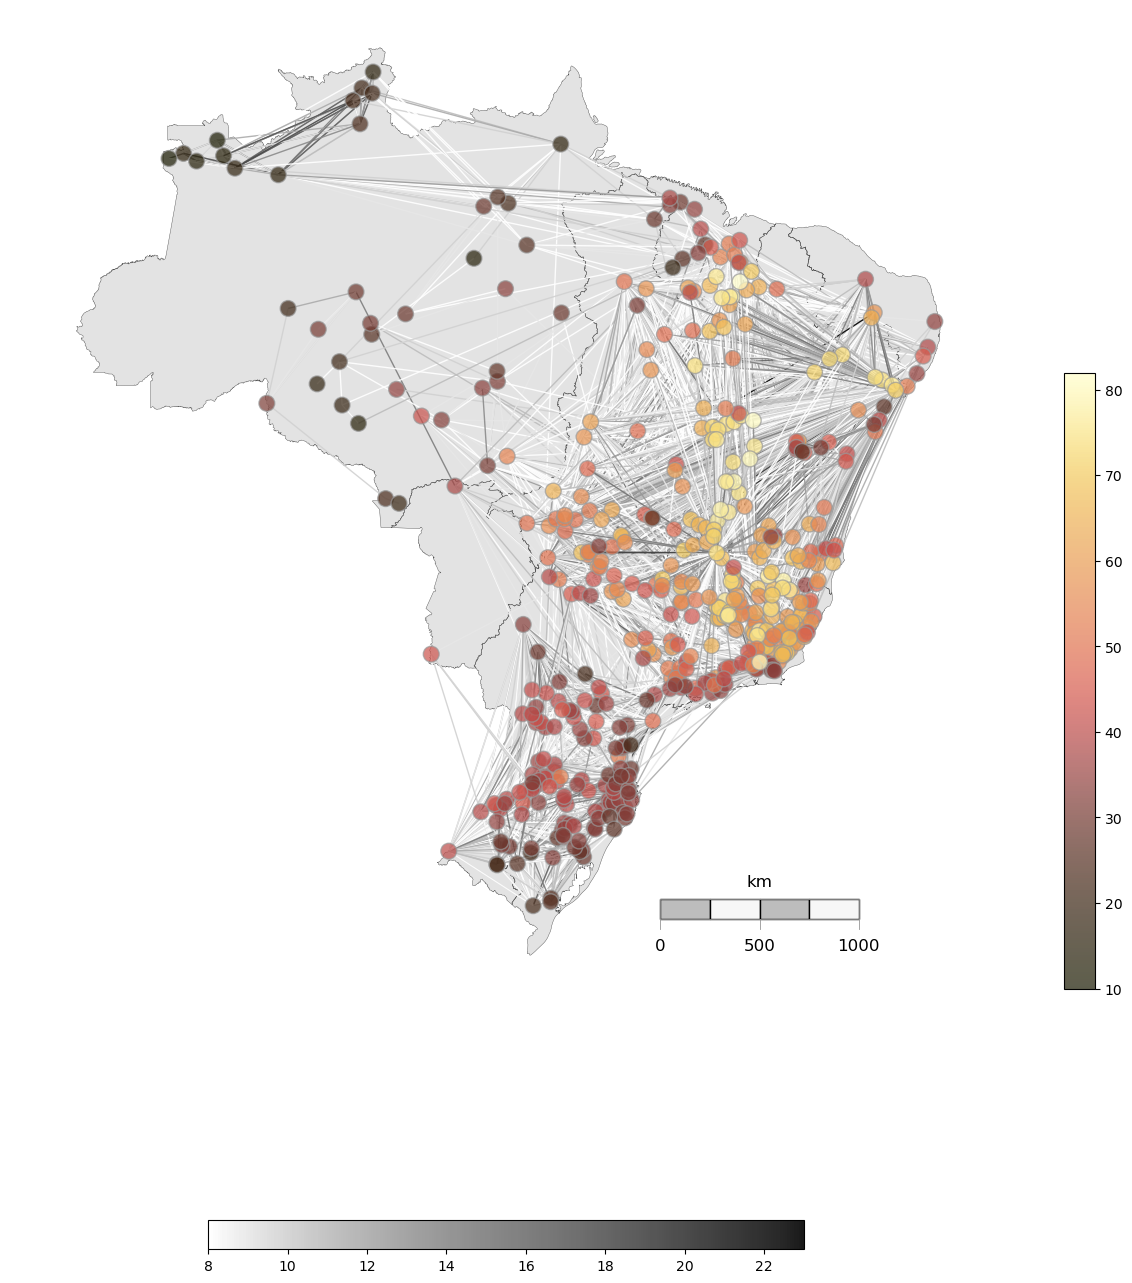

In [12]:
#Set up base map
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
                llcrnrlon=-77, urcrnrlon=-32, resolution='i')

# 1. Draw the map background
m.shadedrelief()
m.drawmapboundary(color="#ffffff")
m.drawmapscale(-43,-32,-33, 10, 1000, barstyle='fancy', 
               fillcolor1="#bdbdbd", fillcolor2="#f7f7f7", 
               linecolor="#969696", linewidth=0.6, fontsize=12)

m.readshapefile('SNIRH_RegioesHidrograficas_2020', 'regions', color="#525252", linewidth=0.3)
regions_info= m.readshapefile('/SNIRH_RegioesHidrograficas_2020', 'regions', drawbounds=False)

patches = []
patches2 = []
patches3 = []
patches4 = []
patches5 = []
patches6 = []
patches7 = []
patches8 = []
patches9 = []
patches10 = []
patches11 = []
patches12 = []

# for info, shape in zip(m.biomas_info, m.biomas):
for info, shape in zip(m.regions_info, m.regions):
    if info['rhi_nm'] == 'URUGUAI':
        patches.append( Polygon(np.array(shape), True))
    if info['rhi_nm'] == 'SÃO FRANCISCO':
        patches2.append( Polygon(np.array(shape), True))
    if info['rhi_nm'] == 'PARANÁ':
        patches3.append( Polygon(np.array(shape), True))    
    if info['rhi_nm'] == 'TOCANTINS-ARAGUAIA':
        patches4.append( Polygon(np.array(shape), True)) 
    if info['rhi_nm'] == 'PARAGUAI':
        patches5.append( Polygon(np.array(shape), True)) 
    if info['rhi_nm'] == 'PARNAÍBA':
        patches6.append( Polygon(np.array(shape), True)) 
    if info['rhi_nm'] == 'ATLÂNTICO SUL':
        patches7.append( Polygon(np.array(shape), True)) 
    if info['rhi_nm'] == 'ATLÂNTICO NORDESTE ORIENTAL':
        patches8.append( Polygon(np.array(shape), True))
    if info['rhi_nm'] == 'ATLÂNTICO NORDESTE OCIDENTAL':
        patches9.append( Polygon(np.array(shape), True))
    if info['rhi_nm'] == 'AMAZÔNICA':
        patches10.append( Polygon(np.array(shape), True))
    if info['rhi_nm'] == 'ATLÂNTICO SUDESTE':
        patches11.append( Polygon(np.array(shape), True)) 
    if info['rhi_nm'] == 'ATLÂNTICO LESTE':
        patches12.append( Polygon(np.array(shape), True)) 
        
ax.add_collection(PatchCollection(patches, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label = "Uruguay"))
ax.add_collection(PatchCollection(patches2, facecolor="#e0e0e0" , linewidths=2, zorder=1, alpha=0.9, label = "São Francisco"))
ax.add_collection(PatchCollection(patches3, facecolor="#e0e0e0",  zorder=1, alpha=0.9, label = "Paraná"))
ax.add_collection(PatchCollection(patches4, facecolor="#e0e0e0", zorder=1, alpha=0.9,label = "Tocantins/Araguaia"))
ax.add_collection(PatchCollection(patches5, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label="Paraguay"))
ax.add_collection(PatchCollection(patches6, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label="Parnaíba"))
ax.add_collection(PatchCollection(patches7, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label="South Atlantic"))
ax.add_collection(PatchCollection(patches8, facecolor="#e0e0e0" ,zorder=1, alpha=0.9, label="Western Northeast Atlantic"))
ax.add_collection(PatchCollection(patches9, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label="Eastern Northeast Atlantic"))
ax.add_collection(PatchCollection(patches10, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label="Amazon"))
ax.add_collection(PatchCollection(patches11, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label="Southeast Atlantic"))
ax.add_collection(PatchCollection(patches12, facecolor="#e0e0e0" , zorder=1, alpha=0.9, label="East Atlantic"))

#2.draw nodes and edges and over aly on basemap

colorn=cm.lajolla
nodes=nx.draw_networkx_nodes(
                        G = graph, pos = pos ,alpha = 0.7,
                        nodelist=graph.nodes(),
                        node_size = 130, label="Catchments",
                        node_color=node_degree['Average N of events per year'].astype(int), 
                        cmap=colorn, edgecolors='#999999'
                            )
plt.colorbar(nodes, orientation='vertical', shrink=0.4)

colore=cm.grayC.reversed()
edges=nx.draw_networkx_edges(
                        G = graph, pos = pos, 
                        alpha=0.9, 
                        arrows = False, 
                        label="Connections", width=1.0,
                        edge_color=high_connec['N of connected events'].astype(int),
                        edge_cmap=colore,
                            )
nodes.set_zorder(3)
edges.set_zorder(2)

plt.colorbar(edges, orientation='horizontal', shrink=0.6)

plt.savefig('Co-occur.png', format = "png", dpi = 400)

plt.show